In [1]:
#import glob
#path_list = glob.glob('广东、深圳海事局事故调查报告/*')

### 自己安装一下必要的python库

In [2]:
import docx
#import PyPDF2
from tqdm import trange

In [3]:
#pycryptodome这个也需要安装
#pip install pycryptodome -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com

In [4]:
#pip install wordcloud -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com

In [5]:
#现在暂时用不上了 这是之前从原pdf里读取文本内容的程序 先放着

#输入pdf或者docx地址，输出文本内容。
#默认输入是这两种文件格式，否则不处理。
def get_text(path):
    # 使用open的‘rb’方法打开pdf文件，使用二进制模式
    text = ''
    if path.endswith('pdf'):
        mypdf = open(path,mode='rb')
        # 调用PdfFileReader函数
        pdf_document = PyPDF2.PdfReader(mypdf)
        
        # 使用PdfFileReader对象的变量，获取各个信息，如numPages属性获取PDF文档的页数
        for i in range(len(pdf_document.pages)):
            # 调用Page对象的extractText()方法，返回该页文本的字符串
            temp = pdf_document.pages[i].extract_text()
            text += temp
    elif path.endswith('docx'):
        #获取文档对象
        file=docx.Document(path)

        #输出每一段的内容
        for para in file.paragraphs:
            text += para.text
    else:
        print('我们只处理docx和pdf文件')
        assert 1==0
        
    return text

### 读取文档

In [6]:
#text_list = []
#for i in trange(len(path_list)):
#    text_list.append(get_text(path_list[i]))
    
text = ''
file=docx.Document('文稿修订版.docx')

#输出每一段的内容
for para in file.paragraphs:
    text += para.text
    
text_list = text.split('Ship collision investigation report')[:-1]

In [7]:
text3 = ''
file3=docx.Document('事故等级修订版.docx')

#输出每一段的内容
for para3 in file3.paragraphs:
    text3 += para3.text

In [8]:
def change_label(x):
    if '小' in x:
        return '小'
    elif '一般' in x:
        return '一般'
    elif '较大' in x:
        return '较大'
    else:
        return '重大'
    
collapse_label = list(map(lambda x: change_label(x),text3.split('事故')[:-1]))

In [9]:
#text2 = ''
#file2=docx.Document('水上交通事故等级.docx')

#输出每一段的内容
#for para2 in file2.paragraphs:
#    text2 += para2.text

In [10]:
#collapse_label = text2.split('等级水上交通事故')[:-1]

In [11]:
#输出一个示例文档给你看一眼
text_list[0]

'1、“南澳旅游3XX”作为让路船，未履行让路义务根据两船在事故发生时的相对方位和航向，两船会遇时属于交叉相遇局面（详见图2），依据《1972年国际海上避碰规则》第十五条，当两艘机动船交叉相遇致有构成碰撞危险时，有他船在本船右舷的船舶应给他船让路。此次事故中“南澳旅游3XX”是让路船，未履行让路船义务。2、未使用安全航速“南澳旅游3XX”“南澳旅游6XX”驾驶员在清楚渔排水域内休闲旅游船舶、通航密度大，且航行视线受阻的情况下，仍麻痹大意，心存侥幸，未使用安全航速航行，导致在发生碰撞危险时，未预留足够的时间和空间采取有效的转向、减速或停车的避碰措施。双方行为都违反了《1972年国际海上避碰规则》第六条“每一船在任何时候都应以安全航速行驶，以便能采取适当而有效的避让行动，并能在适合当时环境和情况的距离以内把船停住”的规定。（二）间接原因驾驶员缺乏安全风险意识“南澳旅游3XX”实际管理人、驾驶人林*龙未购买船舶保险，未进行船舶安全检查，缺乏安全风险意识；“南澳旅游6XX”与深圳市东部南澳旅游服务有限公司签订了服务协议，但服务限于购买公众责任保险、船舶年审、换证、协调纠纷等事项，缺乏安全管理和缺乏安全培训教育，以致于驾驶员安全意识不高。'

---
### 文本处理（特殊字符过滤-停用词过滤-分词）

In [12]:
import jieba
import json


# 读取停用词列表
def get_stopword_list(file):
    with open(file, 'r', encoding='utf-8') as f:    # 
        stopword_list = [word.strip('\n') for word in f.readlines()]
    return stopword_list


# 分词 然后清除停用词语
def clean_stopword(strr, stopword_list):
    result = ''
    word_list = jieba.lcut(strr)   # 分词后返回一个列表  jieba.cut(）   返回的是一个迭代器
    for w in word_list:
        if w not in stopword_list:
            result += (' ' + w)
    return result

import re
def clean_special(strr):
    result = re.sub('[^\u4e00-\u9fa5]+','',strr)
    return result

stopword_file = 'stopwords.txt'
stopword_list = get_stopword_list(stopword_file)    # 获得停用词列表

jieba.load_userdict(r"user_dict.txt") #加载我们自定义的不分词的专有名词

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/58/d96tlg8x2rbbshx1m781013c0000gn/T/jieba.cache
Loading model cost 0.665 seconds.
Prefix dict has been built successfully.


In [13]:
clean_text_list = list(map(clean_special,text_list))
clean_text_list = list(map(lambda x: clean_stopword(x,stopword_list),clean_text_list))

In [14]:
###输出一个处理后的文档给你看看
clean_text_list[0]

' 让路 让路 时 会 局面 图 年 避碰 船 船 让路 中 让路 让路 船 未使用安全航速 驾驶员 内 通航密度大 视线 受阻 下 仍 麻痹大意 心存侥幸 未使用安全航速 预留 采取有效 避 碰 都 年 避碰 都 避让 环境 船 二 间接原因 驾驶员 缺乏安全风险意识 人 未 保险 未 安全检查 缺乏安全风险意识 协议 责任保险 年 审 协调 缺乏安全培训教育 驾驶员 安全意识'

---
### 平滑处理+tfidf文本向量化

In [15]:
# coding:utf-8  
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 

#语料,已经分好词的预料
corpus=clean_text_list
#将文本中的词语转换为词频矩阵  
vectorizer = CountVectorizer(stop_words=None)  
#计算个词语出现的次数  
X = vectorizer.fit_transform(corpus)  
#获取词袋中所有文本关键词  
word = vectorizer.get_feature_names_out()  
#查看词频结果  
df_word =  pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

# ---------------------------------------------------- 

#类调用  
transformer = TfidfTransformer(smooth_idf=True,norm='l2',use_idf=True)  
#print(transformer)
#将计算好的词频矩阵X统计成TF-IDF值  
tfidf = transformer.fit_transform(X)  
#查看计算的tf-idf
df_word_tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names_out())
#查看计算的idf
df_word_idf = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(),transformer.idf_)),columns=['单词','idf'])

In [16]:
df_word_idf

,单词,idf
0,三管,4.921973
1,上岸,4.921973
2,上游,4.228826
3,上甲板,4.921973
4,上船,4.921973
...,...,...
426,鸣响,4.921973
427,鸣放,3.669210
428,鸣笛,4.516508
429,麻痹大意,4.921973


In [17]:
print('目前词向量的数量为：%d'%len(word))

## 论文中为498

目前词向量的数量为：431


### 卡方统计对词向量筛选降维

In [18]:
import numpy as np

a = df_word_tfidf.values
b = np.sum(df_word_tfidf.values,axis = 0) - df_word_tfidf.values
c = np.sum(df_word_tfidf.values,axis = 1).reshape(-1,1) - df_word_tfidf.values
d = df_word_tfidf.values + np.sum(df_word_tfidf.values) - np.sum(df_word_tfidf.values,axis = 0) - np.sum(df_word_tfidf.values,axis = 1).reshape(-1,1)
index_list = set(np.where(a+c==0)[0])
df_word_tfidf = df_word_tfidf.drop(index = list(index_list))
a = df_word_tfidf.values
b = np.sum(df_word_tfidf.values,axis = 0) - df_word_tfidf.values
c = np.sum(df_word_tfidf.values,axis = 1).reshape(-1,1) - df_word_tfidf.values
d = df_word_tfidf.values + np.sum(df_word_tfidf.values) - np.sum(df_word_tfidf.values,axis = 0) - np.sum(df_word_tfidf.values,axis = 1).reshape(-1,1)

In [19]:
chi_v = (len(df_word_tfidf)*(a*d - c*d)**2)/((a+c)*(b+d)*(a+b)*(c+d))

In [20]:
## 卡方筛选
final_words = df_word_tfidf.columns[np.argsort(np.nanmax(chi_v,axis = 0))[:300]]

In [21]:
#我们根据卡方特征筛选出得分最高的前200个，保存到final_words.txt里。
final_words

Index(['避让', '避碰', '局面', '让路', '未保持正规瞭望', '值班', '驾驶员', '环境', '紧迫', '未使用安全航速',
       ...
       '详细情况', '间隙', '事故现场', '安全隐患', '取得联系', '高压', '日常', '作业区', '降血压', '休息时间'],
      dtype='object', length=300)

In [22]:
f=open("final_words.txt","w")
 
for line in final_words:
    f.write(line+'\n')
f.close()

**然后我们需要人工审核筛选一波真正的reason，因为很多重要的词向量比如 “碰撞”，确实重要，但是对于我们进一步分析撞船并没有太大帮助**

**我已经自己过滤了一遍，保留了最终个特征作为最终的原因。**

In [23]:
with open("user_dict.txt", "r") as f:
    tempp = []
    for line in f.readlines():
        tempp.append(line.strip('\n'))  #去掉列表中每一个元素的换行符

In [24]:
with open("final_words.txt", "r") as f:
    temppp = []
    for line in f.readlines():
        temppp.append(line.strip('\n'))  #去掉列表中每一个元素的换行符

In [25]:
#那些被我们认可的词（自定义词库里的词）然后同时卡方值比较高满足要求的，才是最终被选择的。
for temp in tempp:
    if temp not in temppp:
        print(temp)

In [26]:
final_reason = []
for temp in tempp:
    if temp in temppp:
        final_reason.append(temp)

In [27]:
f=open("final_reason.txt","w")
 
for line in final_reason:
    f.write(line+'\n')
f.close()

In [28]:
with open("final_reason.txt", "r") as f:
    final_reason = []
    for line in f.readlines():
        final_reason.append(line.strip('\n'))  #去掉列表中每一个元素的换行符

In [29]:
print('最终词向量的数量为：%d'%len(final_reason))

## 论文中为33
## 也可以进一步润色，直接对final_reason.txt里删减就行。

最终词向量的数量为：35


### 词云图

In [30]:
mytext = ''.join(clean_text_list)
mytext = mytext.split(' ')
mytext = list(filter(lambda x: x in final_reason,mytext))
mytext = ' '.join(mytext)

Populating the interactive namespace from numpy and matplotlib


(-0.5, 1599.5, 799.5, -0.5)

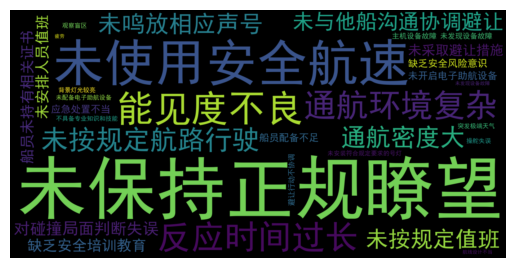

In [32]:
%pylab inline
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="SimHei.ttf",scale=4,max_words = 100,max_font_size = 60,random_state=20).generate(mytext)

import matplotlib.pyplot as plt
#plt.figure(figsize = (8,6),dpi = 600)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

<AxesSubplot:xlabel='name', ylabel='freq'>

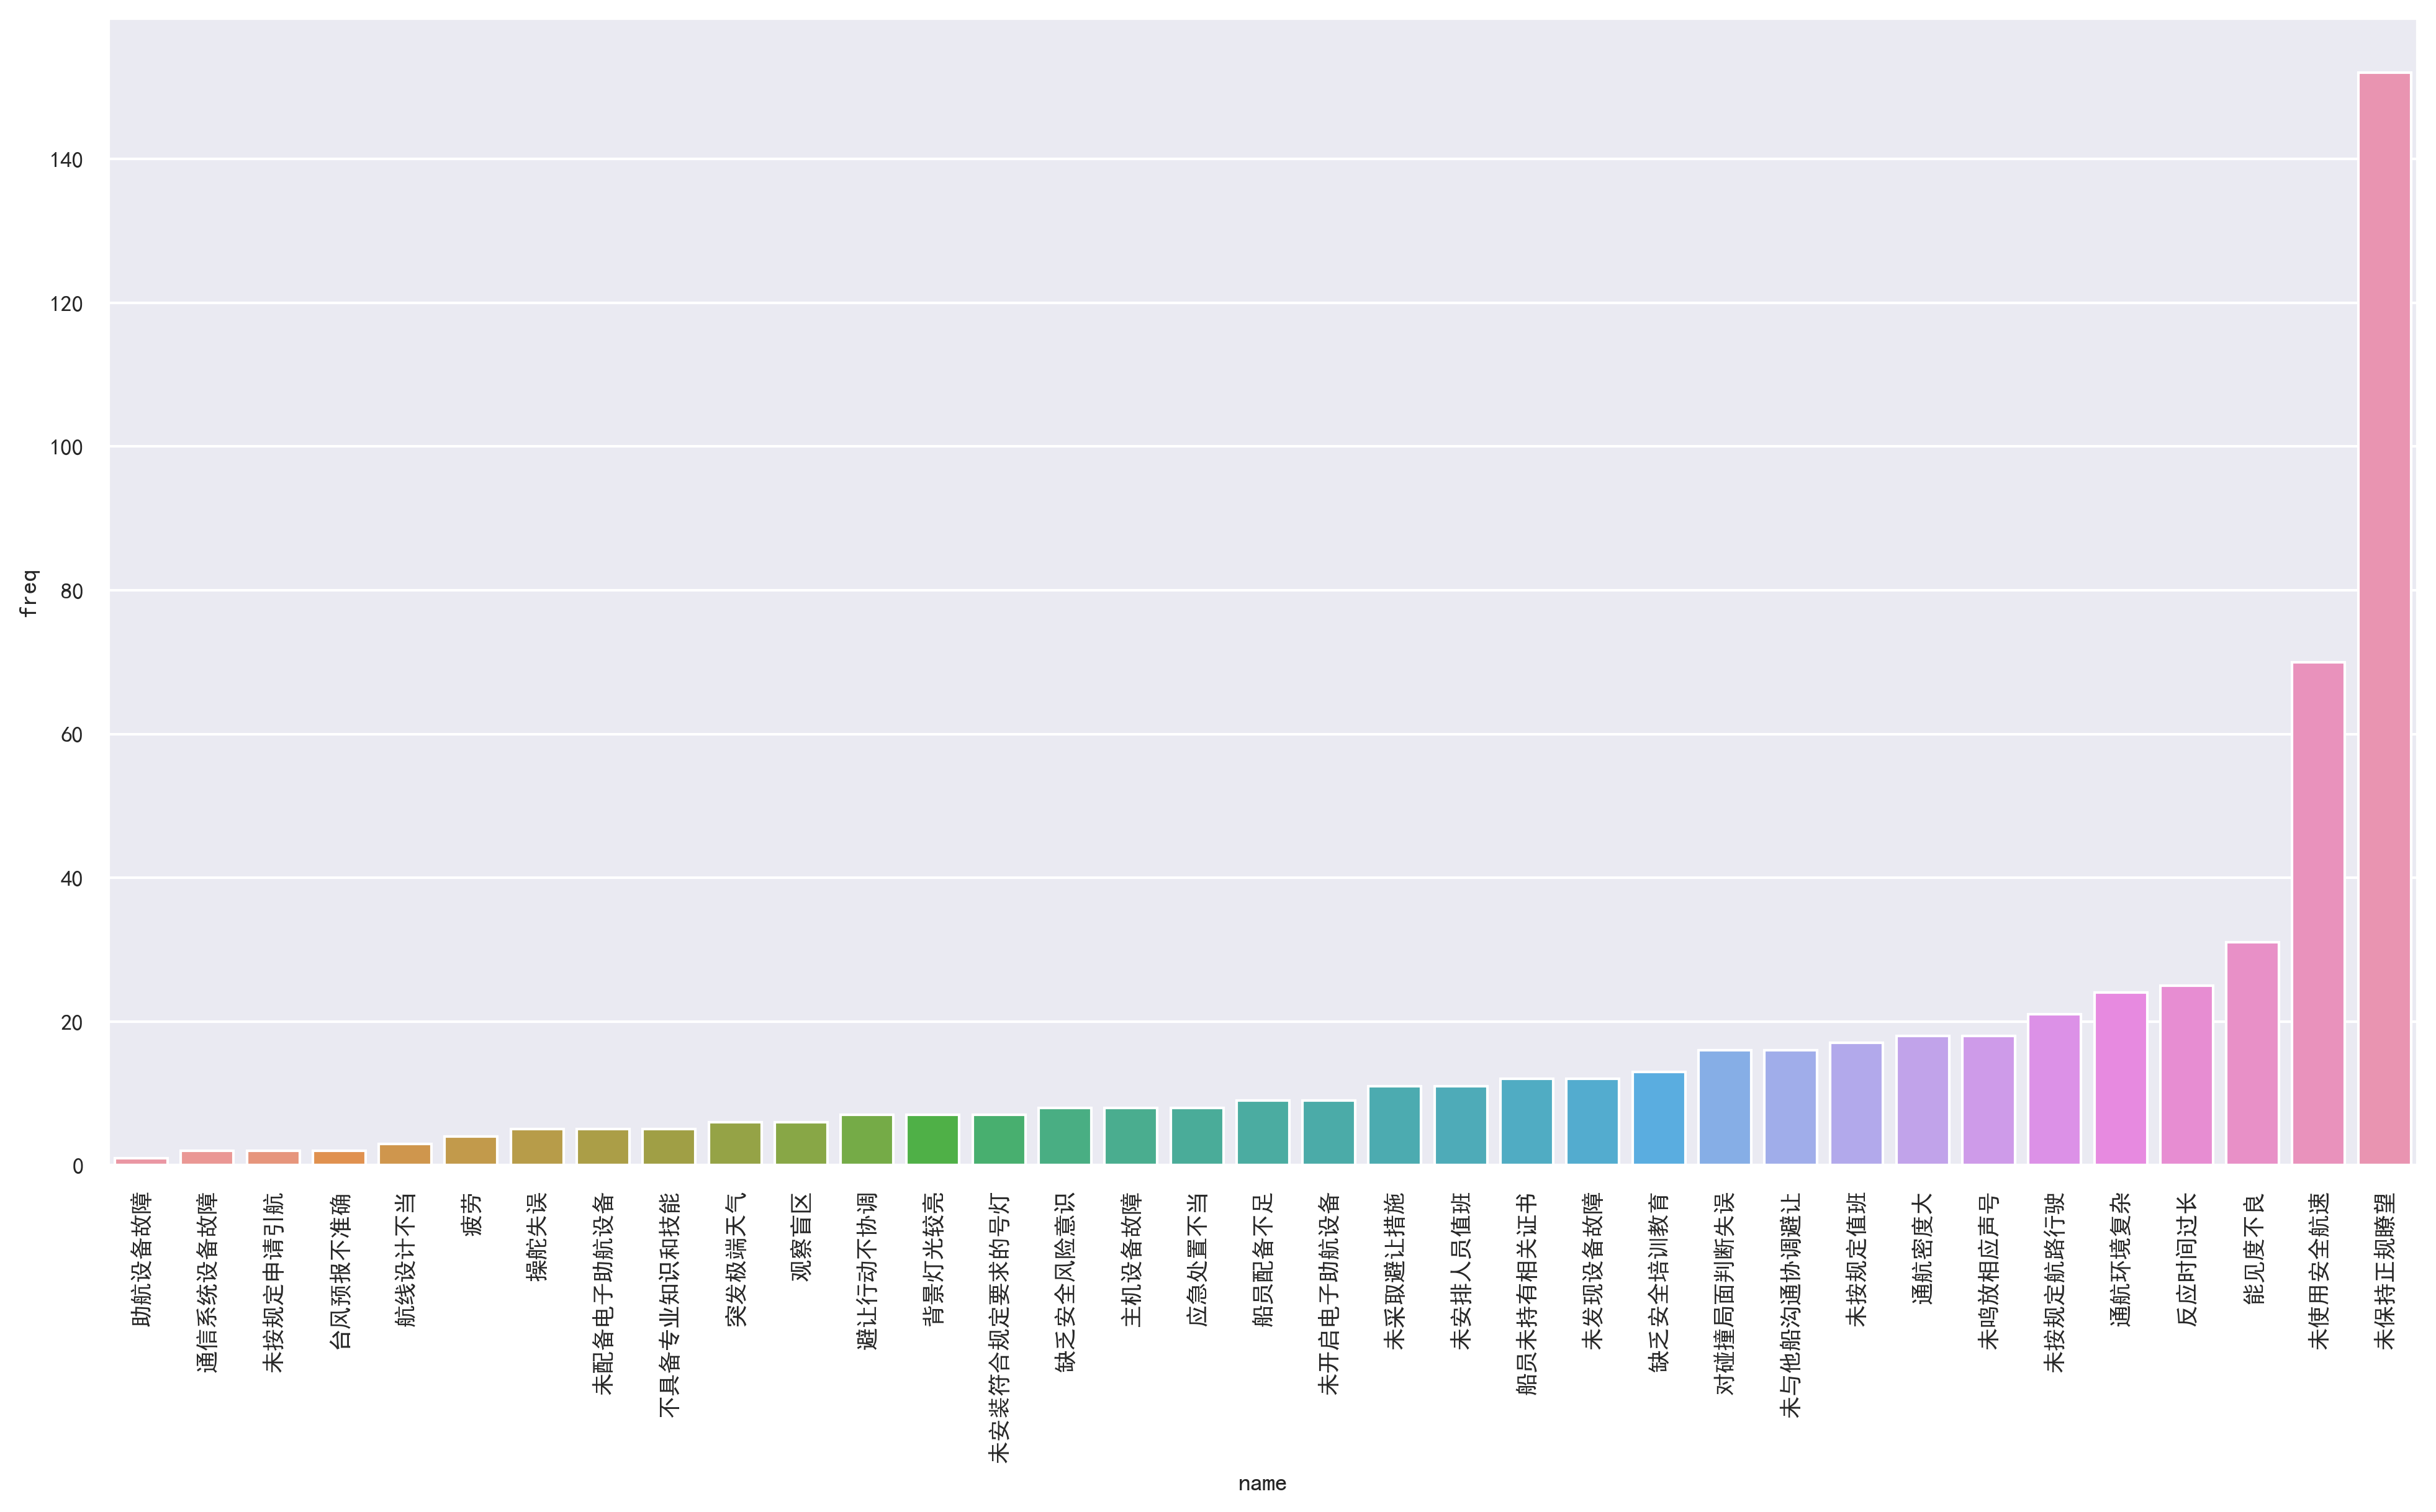

In [33]:
bar_data = df_word[final_reason].sum()
name = bar_data.index
bar_data = pd.DataFrame(data = bar_data.values,columns = ['freq'])
bar_data['name'] = name
bar_data = bar_data.sort_values('freq')

import seaborn as sns
plt.figure(figsize = (16,8),dpi = 300)
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
plt.xticks(rotation=90)
sns.barplot(x = 'name',y = 'freq',data = bar_data.iloc[-37:,:]) #显示最多的30个，可以任意修改

In [34]:
#表3获取
def final_check(x):
    x = x.split(' ')
    x = list(filter(lambda x: x in final_reason,x))
    return ' '.join(x)
final_text = list(map(lambda x: final_check(x),clean_text_list))

In [35]:
# coding:utf-8  
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfTransformer 

#语料,已经分好词的预料
corpus=final_text
#将文本中的词语转换为词频矩阵  
vectorizer = CountVectorizer(stop_words=None)  
#计算个词语出现的次数  
X = vectorizer.fit_transform(corpus)  
#获取词袋中所有文本关键词  
word = vectorizer.get_feature_names_out()  
#查看词频结果  
df_word =  pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

# ---------------------------------------------------- 

#类调用  
transformer = TfidfTransformer(smooth_idf=True,norm='l2',use_idf=True)  
#print(transformer)
#将计算好的词频矩阵X统计成TF-IDF值  
tfidf = transformer.fit_transform(X)  
#查看计算的tf-idf
df_word_tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names_out())
#查看计算的idf
df_word_idf = pd.DataFrame(list(zip(vectorizer.get_feature_names_out(),transformer.idf_)),columns=['单词','idf'])

In [36]:
df_word_tfidf.iloc[:,:20]

,不具备专业知识和技能,主机设备故障,助航设备故障,反应时间过长,台风预报不准确,对碰撞局面判断失误,应急处置不当,操舵失误,未与他船沟通协调避让,未使用安全航速,未保持正规瞭望,未发现设备故障,未安排人员值班,未安装符合规定要求的号灯,未开启电子助航设备,未按规定值班,未按规定申请引航,未按规定航路行驶,未配备电子助航设备,未采取避让措施
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.404059,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.928161,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.723884,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.689922,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.519318,0.854581,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.898757,0.000000,0.438447,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.650052,0.0,0.000000,0.0,0.482727,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [37]:
df_word_tfidf.iloc[:,20:40]

,未鸣放相应声号,疲劳,突发极端天气,缺乏安全培训教育,缺乏安全风险意识,背景灯光较亮,能见度不良,航线设计不当,船员未持有相关证书,船员配备不足,观察盲区,通信系统设备故障,通航密度大,通航环境复杂,避让行动不协调
0,0.0,0.0,0.000000,0.340745,0.789966,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.310777,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.372178
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
96,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.586862,0.0,0.0,0.000000,0.0,0.000000
97,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
98,0.0,0.0,0.720088,0.000000,0.693882,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [38]:
df_word_tfidf.to_excel('word_tfidf.xlsx',index = None)

In [39]:
from pgmpy.models import BayesianModel

In [40]:
E_connect = [('E3','E4'),('E3','E1'),('E2','E1'),('E5','E6'),('E1','E'),('E4','E'),('E5','E'),('M10','E3')]
M_connect = [('M1','M'),('M2','M'),('M8','M'),('M3','M'),('M9','M'),('M10','M'),('M7','M8'),('M5','M1'),('M5','M2'),('M5','M7'),('M5','M3'),('M5','M9'),('M5','M1'),('M5','H10'),('M5','H14'),('M4','M5'),('M6','M5'),('M6','H2')]
H_connect = [('H2','H3'),('H2','H4'),('H2','H6'),('H2','H5'),('H2','H7'),('H4','H9'),('H4','H11'),('H4','H13'),('H6','H11'),('H6','H13'),('H5','H11'),('H5','H13'),('H2','H3'),('H2','H4'),('H2','H6'),('H2','H5'),('H2','H7'),('H4','H9'),('H4','H11'),('H4','H13'),('H6','H11'),('H6','H13'),('H5','H11'),('H5','H13'),('H5','H10'),('H5','H14'),('H11','H12'),('H12','H'),('H13','H'),('H10','H'),('H14','H'),('H1','H'),('H16','H'),('H8','H15'),('H15','H')]
S_connect = [('S3','S'),('S2','S'),('S2','H11'),('S1','S')]
CENTER_connect = [('H','COLLAPSE'),('E','COLLAPSE'),('M','COLLAPSE'),('S','COLLAPSE')]

In [41]:
E_name = ['通航环境复杂','通航密度大','突发极端天气','能见度不良','背景灯光较亮','观察盲区']
M_name = ['未发现设备故障','未配备电子助航设备','未安装符合规定要求的号灯','船员未持有相关证书','不具备专业知识和技能','缺乏安全培训教育','船员配备不足','未安排人员值班','未按规定申请引航','台风预报不准确']
H_name = ['航线设计不当','缺乏安全风险意识','未按规定航路行驶','未保持正规瞭望','未使用安全航速','未开启电子助航设备','未按规定值班','疲劳','未鸣放相应声号','对碰撞局面判断失误','未与他船沟通协调避让','避让行动不协调','未采取避让措施','操舵失误','反应时间过长','应急处置不当']
S_name = ['主机设备故障','通信系统设备故障','助航设备故障']
ALL_name = E_name + M_name + H_name + S_name

In [42]:
import warnings
warnings.filterwarnings("ignore")

bys_data = df_word_tfidf[ALL_name]

#EMHS分别是各自因素的总和
bys_data['E'] = np.sum(df_word_tfidf[E_name].values,axis = 1)
bys_data['M'] = np.sum(df_word_tfidf[M_name].values,axis = 1)
bys_data['H'] = np.sum(df_word_tfidf[H_name].values,axis = 1)
bys_data['S'] = np.sum(df_word_tfidf[S_name].values,axis = 1)

#collapse根据一般较大重大来赋值
def get_label(x):
    if x =='小':
        return 0
    elif x == '一般':
        return 1
    elif x == '较大':
        return 2
    else:
        return 3
    
bys_data['COLLAPSE'] = list(map(lambda x:get_label(x),collapse_label))


values =  (bys_data.values > 0).astype(int)
values[:,-1] = bys_data.values[:,-1]
Simple_names = ['E%d'%(i+1) for i in range(len(E_name))] + ['M%d'%(i+1) for i in range(len(M_name))] + ['H%d'%(i+1) for i in range(len(H_name))] + ['S%d'%(i+1) for i in range(len(S_name))]
new_pd = pd.DataFrame(values,columns = Simple_names + ['E','M','H','S','COLLAPSE'])

In [43]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator

model = BayesianModel(E_connect + M_connect + H_connect + S_connect + CENTER_connect)

model.fit(new_pd, estimator=BayesianEstimator, prior_type="BDeu") # default equivalent_sample_size=5

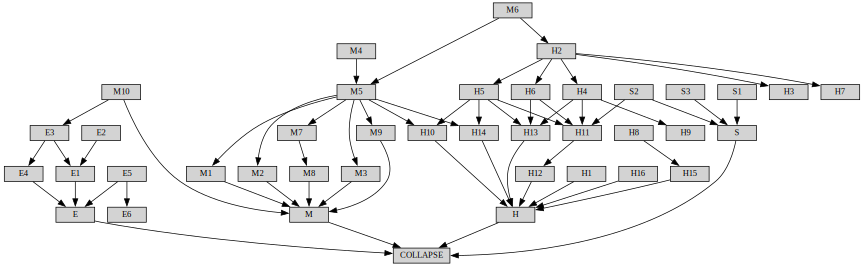

In [44]:
def showBN(model, save=True):
    '''传入BayesianModel对象，调用graphviz绘制结构图，jupyter中可直接显示'''
    from graphviz import Digraph
    node_attr = dict(
     style='filled',
     shape='box',
     align='left',
     fontsize='12',
     ranksep='0.1',
     height='0.2'
    )
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    edges=model.edges()
    for a,b in edges:
        dot.edge(a,b)
    if save:
        dot.view(cleanup=True)
    return dot
showBN(model)

In [45]:
#输出节点信息
print(model.nodes())
#输出依赖关系
print(model.edges())
#查看某节点概率分布
print(model.get_cpds('E1').values)
#这个矩阵就是E3,E2到E1的条件概率矩阵

['E3', 'E4', 'E1', 'E2', 'E5', 'E6', 'E', 'M10', 'M1', 'M', 'M2', 'M8', 'M3', 'M9', 'M7', 'M5', 'H10', 'H14', 'M4', 'M6', 'H2', 'H3', 'H4', 'H6', 'H5', 'H7', 'H9', 'H11', 'H13', 'H12', 'H', 'H1', 'H16', 'H8', 'H15', 'S3', 'S', 'S2', 'S1', 'COLLAPSE']
[('E3', 'E4'), ('E3', 'E1'), ('E4', 'E'), ('E1', 'E'), ('E2', 'E1'), ('E5', 'E6'), ('E5', 'E'), ('E', 'COLLAPSE'), ('M10', 'E3'), ('M10', 'M'), ('M1', 'M'), ('M', 'COLLAPSE'), ('M2', 'M'), ('M8', 'M'), ('M3', 'M'), ('M9', 'M'), ('M7', 'M8'), ('M5', 'M1'), ('M5', 'M2'), ('M5', 'M7'), ('M5', 'M3'), ('M5', 'M9'), ('M5', 'H10'), ('M5', 'H14'), ('H10', 'H'), ('H14', 'H'), ('M4', 'M5'), ('M6', 'M5'), ('M6', 'H2'), ('H2', 'H3'), ('H2', 'H4'), ('H2', 'H6'), ('H2', 'H5'), ('H2', 'H7'), ('H4', 'H9'), ('H4', 'H11'), ('H4', 'H13'), ('H6', 'H11'), ('H6', 'H13'), ('H5', 'H11'), ('H5', 'H13'), ('H5', 'H10'), ('H5', 'H14'), ('H11', 'H12'), ('H13', 'H'), ('H12', 'H'), ('H', 'COLLAPSE'), ('H1', 'H'), ('H16', 'H'), ('H8', 'H15'), ('H15', 'H'), ('S3', 'S'), (

In [46]:
#正向推理例子：
#如下例，evidence里放设置的因子值，0表示没有，1表示有。
#variables表示推断结果，我设置collapse就是碰撞概率。
from pgmpy.inference import VariableElimination
model_infer = VariableElimination(model)

q = model_infer.query(variables=['COLLAPSE'], evidence={'E1': 0,'E2': 1 })
print(q)
#这就表示在E1指标不存在(通航环境复杂) E2指标存在(通航密度大)的情况下，
#发生一般碰撞的概率是0.7648，发生较大碰撞的概率是0.1544，发生重大碰撞的概率是0.0808

+-------------+-----------------+
| COLLAPSE    |   phi(COLLAPSE) |
+=============+=================+
| COLLAPSE(0) |          0.1628 |
+-------------+-----------------+
| COLLAPSE(1) |          0.6344 |
+-------------+-----------------+
| COLLAPSE(2) |          0.1331 |
+-------------+-----------------+
| COLLAPSE(3) |          0.0697 |
+-------------+-----------------+


In [47]:
q = model_infer.query(variables=['E1','E2'], evidence={'COLLAPSE':2})
print(q)

+-------+-------+--------------+
| E1    | E2    |   phi(E1,E2) |
+=======+=======+==============+
| E1(0) | E2(0) |       0.7473 |
+-------+-------+--------------+
| E1(0) | E2(1) |       0.0779 |
+-------+-------+--------------+
| E1(1) | E2(0) |       0.0724 |
+-------+-------+--------------+
| E1(1) | E2(1) |       0.1023 |
+-------+-------+--------------+


In [48]:
#反向推理，给定结果，发生重大碰撞的情况下，返回EMHS四个因子各自的占比。
#使用和上面同理，反向待计算的“因”放variables 给定的“果”放evidence里。
q = model_infer.query(variables=['E','M','H','S'], evidence={'COLLAPSE': 2})
print(q)
#这里给出在一般碰撞情况下，EMHS各自发生与不发生16种组合的概率。

+------+------+------+------+----------------+
| E    | M    | H    | S    |   phi(E,M,H,S) |
+======+======+======+======+================+
| E(0) | M(0) | H(0) | S(0) |         0.0081 |
+------+------+------+------+----------------+
| E(0) | M(0) | H(0) | S(1) |         0.0094 |
+------+------+------+------+----------------+
| E(0) | M(0) | H(1) | S(0) |         0.1909 |
+------+------+------+------+----------------+
| E(0) | M(0) | H(1) | S(1) |         0.0682 |
+------+------+------+------+----------------+
| E(0) | M(1) | H(0) | S(0) |         0.0497 |
+------+------+------+------+----------------+
| E(0) | M(1) | H(0) | S(1) |         0.0019 |
+------+------+------+------+----------------+
| E(0) | M(1) | H(1) | S(0) |         0.2099 |
+------+------+------+------+----------------+
| E(0) | M(1) | H(1) | S(1) |         0.0033 |
+------+------+------+------+----------------+
| E(1) | M(0) | H(0) | S(0) |         0.0033 |
+------+------+------+------+----------------+
| E(1) | M(0)

In [49]:
prob_list = []
for name in Simple_names:
    prob_temp = 0
    for j in range(3):
        #按照012不同碰撞等级加权。
        prob_temp += model_infer.query(variables=[name], evidence={'COLLAPSE': j}).values[1] * (j+1)
    prob_list.append(prob_temp/5)

In [50]:
#按照概率从高到低输出最危险的致碰撞因子
pd.DataFrame(prob_list,index = ALL_name,columns = ['prob']).sort_values('prob')[::-1]

,prob
未保持正规瞭望,0.725780
未使用安全航速,0.531398
反应时间过长,0.223848
未按规定航路行驶,0.222864
通航密度大,0.213955
对碰撞局面判断失误,0.210191
通航环境复杂,0.204958
未按规定值班,0.188523
未与他船沟通协调避让,0.187131
未鸣放相应声号,0.177145


In [51]:
answer = []
for vari in ['E','M','H','S']:
    final_v = 0
    for label in [0,1,2]:
        
        q = model_infer.query(variables=[vari], evidence={'COLLAPSE': label})
        final_v += (label+1) * q.values[1]
    answer.append(final_v/6)

In [52]:
attri = ['环境','管理','人为','船舶']
for i in range(len(answer)):
    print('碰撞严重程度 %s因素占比：%.4f'%(attri[i],answer[i]))

碰撞严重程度 环境因素占比：0.4476
碰撞严重程度 管理因素占比：0.4357
碰撞严重程度 人为因素占比：0.8937
碰撞严重程度 船舶因素占比：0.1677


### 实证研究

In [57]:
import glob
filelist = glob.glob('10船舶碰撞/*')
test_data = []
for path in filelist:
    
    text = ''
    file=docx.Document(path)

    #输出每一段的内容
    for para in file.paragraphs:
        text += para.text

    test_data.append(text)

In [58]:
test_matrix = np.zeros((len(test_data),len(final_reason)))

In [59]:
for i in range(len(test_data)):
    for j in range(len(ALL_name)):
        if ALL_name[j] in test_data[i]:
            test_matrix[i,j] = 1

In [60]:
#正向推理例子：
#如下例，evidence里放设置的因子值，0表示没有，1表示有。
#variables表示推断结果，我设置collapse就是碰撞概率。
from pgmpy.inference import VariableElimination
model_infer = VariableElimination(model)
for i in range(len(test_data)):
    print('文件名：',filelist[i])
    evidence = {}
    index = np.where(test_matrix[i]==1)[0]
    for ind in index:
        evidence[Simple_names[ind]] = 1
    q = model_infer.query(variables=['COLLAPSE'], evidence=evidence)
    print(q)
    print('***'*30)

文件名： 10船舶碰撞/广州“4·10”“海澜中谷 9”轮与 “浩航 167”轮碰撞事故调查报告.docx
+-------------+-----------------+
| COLLAPSE    |   phi(COLLAPSE) |
+=============+=================+
| COLLAPSE(0) |          0.1677 |
+-------------+-----------------+
| COLLAPSE(1) |          0.6265 |
+-------------+-----------------+
| COLLAPSE(2) |          0.1319 |
+-------------+-----------------+
| COLLAPSE(3) |          0.0739 |
+-------------+-----------------+
******************************************************************************************
文件名： 10船舶碰撞/广州“8·23”“SEA DIAMOND” 与“广龙 6”碰撞事故调查报告.docx
+-------------+-----------------+
| COLLAPSE    |   phi(COLLAPSE) |
+=============+=================+
| COLLAPSE(0) |          0.2215 |
+-------------+-----------------+
| COLLAPSE(1) |          0.5605 |
+-------------+-----------------+
| COLLAPSE(2) |          0.1238 |
+-------------+-----------------+
| COLLAPSE(3) |          0.0943 |
+-------------+-----------------+
****************************************************